In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import math
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

In [2]:
kaggle_api_key_path = ''
if os.getlogin() != 'wtaranto':
    from google.colab import drive
    drive.mount("/content/gdrive")
    with open(keypath, 'r') as f:
        envs = json.load(f)
    os.environ["KAGGLE_USERNAME"] = envs['username']
    os.environ["KAGGLE_KEY"] = envs['key']

## Remember tasks are not completed if you do not comment on the results and include captions

# Task 1 : data ingestion

- Download the Higgs boson data from Kaggle (programmatically within the notebook)

see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data. The command is `!kaggle competitions download......` (you may need to agree to the terms of condition of the higgs boson challenge on the kaggle webpage)


In [3]:
!kaggle competitions download -c higgs-boson
!mkdir data
!mv higgs-boson.zip data
!unzip -q data/higgs-boson.zip -d data

  0%|                                               | 0.00/54.3M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 54.3M/54.3M [00:00<00:00, 1.68GB/s]


In [4]:
higgsdata = pd.read_csv('data/training.zip')
# higgsdata = higgsdata.drop(['KaggleWeight', 'KaggleSet'], axis=1, errors='ignore')
# higgsdata = higgsdata.sample(10000)

In [5]:
#use the training dataset and make your own trainng test set later
# higgsdata = pd.read_csv("training.csv")

# Task 2: data exploration

In [6]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [7]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


do everything else you need to explore the data.... (I can think of 4 more things we have done together)

In [8]:
higgsdata.isna().sum().sum()

np.int64(0)

Good there's no missing data to worry about.

In [9]:
higgsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

All the data are numerical with the exception of the label, so no extra processing required.

Text(0.5, 0.98, 'Original Data - Scatter Matrix')

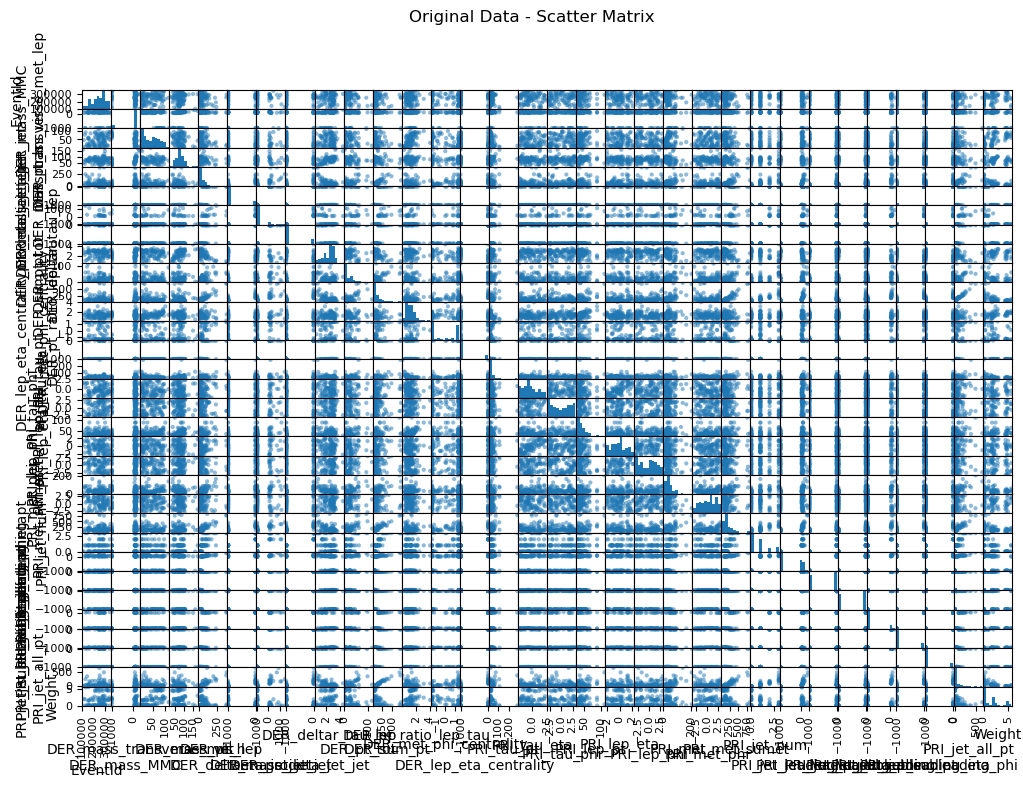

In [10]:
pd.plotting.scatter_matrix(higgsdata.sample(100), figsize=(12,8))
plt.suptitle('Original Data - Scatter Matrix')

Caption: A matrix of scatter plots between the different features of detection events from fundemental particle interations. Data was sourced from 'https://opendata.cern.ch/record/328/files/atlas-higgs-challenge-2014-v2.csv.gz'. The scatter plots have so many features it's hard to pick much useful out of this plot. However, there is some covariance shown in some of the plots which at least gives some hope to the prospect of finding a successful model. 

# Task 3: data preparation


- Read in the trainind data. Extract the target variables. Split the provided training data into a training and a test set.

The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data (along any other variable you should remove) and create a separate variable `labels` and a separate variable `weights`, which will be your target variables for, respectively, classification and regression.



 you will use two target variables (you can read more about the data at https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf): find the corresponding columns of the DF and save them as labels and weights respectively

In [11]:
# 's' stands for signal, 'b' for background. You want to find new particles, i.e. "signal"
labels = higgsdata['Label']
labels

0         s
1         b
2         b
3         b
4         b
         ..
249995    b
249996    b
249997    s
249998    b
249999    b
Name: Label, Length: 250000, dtype: object

In [12]:
# the weight of the particle
weights = higgsdata['Weight']
weights

0         0.002653
1         2.233584
2         2.347389
3         5.446378
4         6.245333
            ...   
249995    4.505083
249996    2.497259
249997    0.018636
249998    1.681611
249999    1.877474
Name: Weight, Length: 250000, dtype: float64

use the "training.csv" file, but create your own train/test sets

In [13]:
higgsdata = higgsdata.drop(['Weight', 'Label'], axis=1, errors='ignore')
train_x, test_x, train_y, test_y = train_test_split(higgsdata, labels, test_size=0.3, random_state=0, stratify=labels)

In [14]:
train_regress_x, test_regress_x, train_regress_y, test_regress_y = train_test_split(higgsdata, weights, test_size=0.3, random_state=0)

#Task 4: answer the question (you, not an AI...) why did I not ask you to scale the data like we did in the cluster models?

This is a tree-based model which only only looks at one feature at a time. This means only a change in ordering would cause a different resulting model, and order is invariant under scaling.

# Task 5: tree-based classifications

Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the `label` of the particles, i.e. if a particle is `Signal` or `Background`. Get the score of each model on both the training and test set, compare them training and test results and comment on the result for each model (adjust the hyperparameters if you need to)


In [15]:
# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [16]:
#now control some hyperparameters
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    n_jobs=-1, random_state=0)


In [17]:
gbt = GradientBoostingClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(gbt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [18]:
gbt = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=1,
    random_state=0)

In [19]:
rf.fit(train_x, train_y)

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=0)

In [20]:
gbt.fit(train_x, train_y)

GradientBoostingClassifier(max_depth=1, random_state=0)

# Task 6: model evaluation

calculate the  scores for the training and test sets and compare etc

In [21]:
print(f"the RF scores on the training test is {rf.score(train_x,train_y):.2%}, on the test is {rf.score(test_x,test_y):.2%}")
print(f"the GBT scores on the training test is {gbt.score(train_x,train_y):.2%}, on the test is {gbt.score(train_x,train_y):.2%}")


the RF scores on the training test is 79.42%, on the test is 79.36%
the GBT scores on the training test is 81.16%, on the test is 81.16%


Both models perform at about 80% correct which is moderately successful. The train vs test sets have nearly zero difference in perfomance score, so overfitting is extremely small. 

- Produce a confusion matrix for each model and compare them






In [22]:
# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix, make sure you pass appropriate label

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='', labels=["P", "N"],
                          cmap=plt.cm.bone):
    """
    Plots a confusion matrix.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        normalize (bool, optional): If True, normalize the confusion matrix. Defaults to False.
        title (str, optional): Title of the plot. Defaults to ''.
        labels (list, optional): List of labels for the classes. Defaults to ["P", "N"].
        cmap (matplotlib.colors.Colormap, optional): Colormap for the plot. Defaults to plt.cm.bone.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'
    # Compute confusion matrix
    if normalize:
      cm = confusion_matrix(y_true, y_pred, normalize='all')
    else:
      cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(np.rot90(cm), cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    plt.xticks([0, 1], labels=labels[::-1])

    plt.text(0,1, cm[0,0], ha='center', c="k" if cm[0,0] > 0.1 * cm.sum() else "w")
    plt.text(0,0, cm[0,1], ha='center', c="k" if cm[0,1] > 0.1 * cm.sum() else "w")
    plt.text(1,1, cm[1,0], ha='center', c="k" if cm[1,0] > 0.1 * cm.sum() else "w")
    plt.text(1,0, cm[1,1], ha='center', c="k" if cm[1,1] > 0.1 * cm.sum() else "w")
    plt.ylim(-0.5,1.5)
    plt.yticks([0,1], labels=labels)
    plt.xlabel("prediction")
    plt.ylabel("truth")
    plt.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = plt.colorbar(im, cax=cax)

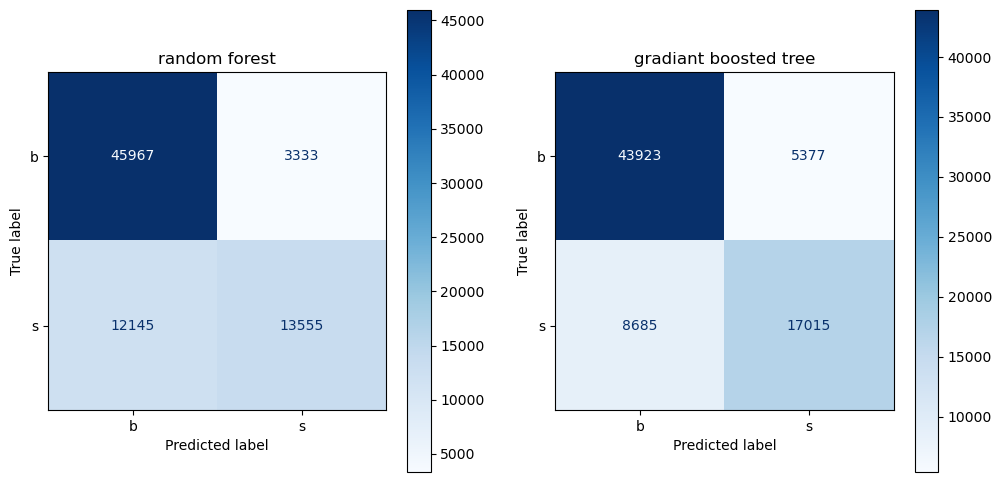

In [23]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].set_title('random forest')
ConfusionMatrixDisplay.from_estimator(rf, test_x, test_y, cmap=plt.cm.Blues, ax=ax[0])
ax[1].set_title('gradiant boosted tree')
ConfusionMatrixDisplay.from_estimator(gbt, test_x, test_y, cmap=plt.cm.Blues, ax=ax[1])

Caption: The confusion matrices for two differe tree-based models. The models attempt to discern signal 's' from background 'b' based on features from particle physics data. Both models perform qualitativly similar, but there are some small differences between the two. The random forest perforaxbest when classifying true background noise while the gradiant boosted tree is better at classifying true signals. Unfortunatly, neither model is strictly better than the other, so the context of the application will ultimately dictate which model should be used. A likely context would be there is too much data to go through manually, so the model acts as a seive picking out the possible canidates for detection. In this case, the gradiant boosted tree would be the prefered model as it is able to screen out much of the background while only disregarding about 30,000 false negatives as opposed to about 40,000 for the random forest.

Plot a simple ROC curve for the RF and GBT models  a d describe it in a caption.

In [24]:
#this will be passed to the ROC function
test_y.values.reshape(-1, 1).flatten() == "s"

array([False, False, False, ...,  True, False,  True], shape=(75000,))

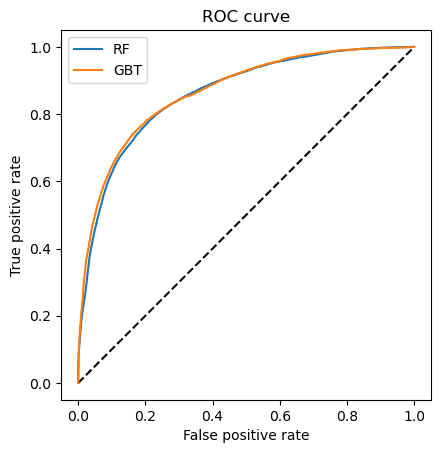

In [25]:
# The random forest model by itself
y_pred_grd_rfcat = rf.predict_proba(test_x)[:, 1]
y_pred_grd_gbtcat = gbt.predict_proba(test_x)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_y.values.reshape(-1, 1).flatten()=="s", y_pred_grd_rfcat)
fpr_gbt, tpr_gbt, _ = roc_curve(test_y.values.reshape(-1, 1).flatten()=="s", y_pred_grd_gbtcat)

fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gbt, tpr_gbt, label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
ax.set_aspect('equal')
plt.show()


Caption: An ROC plot of two different tree-based models. The models attempt to discern signal 's' from background 'b' based on features from particle physics data. Their ROC curves are remarkebly similar. The larges discrepency between the two occurs when the false positive rate ranges from 0-0.2 where the gradient boosted tree outpaces the random forest. This implies that for low false positive rate tolerence the gradient boosted tree model is ever so slightly better at prediction.

#Task 7 required for 661, EC for 461, tree-based regression


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test sets


In [26]:
rfR = RandomForestRegressor(max_depth=3, random_state=302)
rfR.fit(train_regress_x, train_regress_y)
gbtR = GradientBoostingRegressor(max_depth=3, random_state=302)
gbtR.fit(train_regress_x, train_regress_y)

GradientBoostingRegressor(random_state=302)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [27]:
# Make predictions on the test set
rfR_pred = rfR.predict(test_regress_x)
gbtR_pred = gbtR.predict(test_regress_x)

# Manual L1 Loss calculation
rfR_l1 = np.mean(np.abs(test_regress_y - rfR_pred))
gbtR_l1 = np.mean(np.abs(test_regress_y - gbtR_pred))

# Manual L2 Loss calculation
rfR_l2 = np.mean((test_regress_y - rfR_pred) ** 2)
gbtR_l2 = np.mean((test_regress_y - gbtR_pred) ** 2)

print("LOSS FUNCTIONS")
print(f"Random Forest     - L1: {rfR_l1:.4f}, L2: {rfR_l2:.4f}")
print(f"Gradient Boosting - L1: {gbtR_l1:.4f}, L2: {gbtR_l2:.4f}")


LOSS FUNCTIONS
Random Forest     - L1: 1.0065, L2: 1.8379
Gradient Boosting - L1: 0.8437, L2: 1.3691


For both these metrics gradient boosted trees outperfomr the random forest: 16% for L1 and 26% for L2. However, this should be taken with care as the data was never normalized, so some feature errors may be overvalued compared to others. 

#Task 8: Choose between feature importance and grid optimization (due for both 461 and 661)







# Task 8a: feature importance
Use the "Titanic notebook" as a guide for the feature importance analysis  https://github.com/fedhere/DSPS_FBianco/blob/main/Labs/DSPS_2025_titanictree.ipynb

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

(your features may looks slightly different than mine)

Random Forest feature importance:
EventId 0.0 +/- 0.0
DER_mass_MMC 0.265 +/- 0.271
DER_mass_transverse_met_lep 0.23 +/- 0.236
DER_mass_vis 0.085 +/- 0.116
DER_pt_h 0.014 +/- 0.048
DER_deltaeta_jet_jet 0.042 +/- 0.079
DER_mass_jet_jet 0.041 +/- 0.083
DER_prodeta_jet_jet 0.004 +/- 0.023
DER_deltar_tau_lep 0.01 +/- 0.023
DER_pt_tot 0.002 +/- 0.007
DER_sum_pt 0.01 +/- 0.041
DER_pt_ratio_lep_tau 0.066 +/- 0.123
DER_met_phi_centrality 0.06 +/- 0.119
DER_lep_eta_centrality 0.028 +/- 0.071
PRI_tau_pt 0.08 +/- 0.138
PRI_tau_eta 0.0 +/- 0.001
PRI_tau_phi 0.0 +/- 0.0
PRI_lep_pt 0.003 +/- 0.017
PRI_lep_eta 0.0 +/- 0.002
PRI_lep_phi 0.0 +/- 0.0
PRI_met 0.012 +/- 0.039
PRI_met_phi 0.0 +/- 0.0
PRI_met_sumet 0.011 +/- 0.046
PRI_jet_num 0.006 +/- 0.024
PRI_jet_leading_pt 0.006 +/- 0.028
PRI_jet_leading_eta 0.001 +/- 0.005
PRI_jet_leading_phi 0.001 +/- 0.007
PRI_jet_subleading_pt 0.001 +/- 0.011
PRI_jet_subleading_eta 0.001 +/- 0.006
PRI_jet_subleading_phi 0.0 +/- 0.002
PRI_jet_all_pt 0.018 +/- 0.053


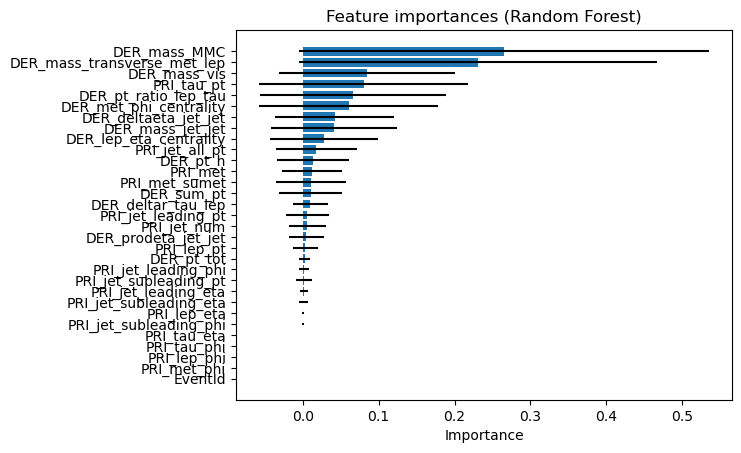

In [28]:
fistd = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
importances_rf = rf.feature_importances_

print("Random Forest feature importance:")
feature_names = higgsdata.columns
for f, fi, s in zip(feature_names, importances_rf, fistd):
  print(f, fi.round(3), "+/-", s.round(3))

indices_rf = np.argsort(importances_rf)

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.barh(range(len(indices_rf)), importances_rf[indices_rf],
         xerr=fistd[indices_rf], align="center")
plt.yticks(range(len(indices_rf)), [feature_names[i] for i in indices_rf])
plt.xlabel("Importance")
plt.show()

Caption: A sorted bar graph of the importance of different features in a random forest model. The two top features are more than twice as important as the third most important feature. The top two are the expected mass of the canidate particle and "the transverse mass between the missing transverse energy and the lepton". The first is clearly important from a particle physics perspective, as the mass of the Higgs is unique among standard model particles and hadrons. The second I would need to know more about particle physics to comment on. Neatly, the EventId, a superfluous variable, has nearly zero importance to tree which is a useful sanity check that the model isn't learning some unforseen non-physical correlation in the data.

# Task 8b: hyperparameters grid search
- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [29]:
# choose your preferred values for the parameters you will test
random_grid = {
    'n_estimators': [10, 100],
    'max_depth': [3, 10, None],
    'bootstrap': [True, False],
    'max_features': [None, 'sqrt']
}

 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation,
# search across 18 different combinations
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
random_search = RandomizedSearchCV(
    estimator = rf,
    param_distributions=random_grid,
    n_iter=1,
    cv=3,
    random_state=0,
    n_jobs=-1
)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [31]:
random_search.fit(train_x[::5], train_y[::5])
# subselecting every 5th observation to reduce the computational time

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 10, None],
                                        'max_features': [None, 'sqrt'],
                                        'n_estimators': [10, 100]},
                   random_state=0)

In [32]:
random_search.best_estimator_

RandomForestClassifier(n_jobs=-1, random_state=0)

In [47]:
for k in random_search.best_params_:
  print(k,random_search.best_params_[k])

n_estimators 100
max_features sqrt
max_depth None
bootstrap True


In [48]:
rf = RandomForestClassifier(**random_search.best_params_, n_jobs=-1, random_state=0)
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [49]:
rf.fit(train_x, train_y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [50]:
pprint("Tuned RF  Parameters: {}".format(random_search.best_params_))
pprint("Best score is {}".format(rf.score(test_x, test_y)))


("Tuned RF  Parameters: {'n_estimators': 100, 'max_features': 'sqrt', "
 "'max_depth': None, 'bootstrap': True}")
'Best score is 0.8383066666666666'


In [51]:
df = pd.DataFrame(random_search.cv_results_) # this shows the result for the given parameters
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.87828,0.063875,0.106169,0.05055,100,sqrt,None,True,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.831319,0.830291,0.831219,0.830943,0.000463,1


Plot a simple  ROC curve for the RF model with the best parameters found in the previous step. Describe it. Compare it with the GBT model from before

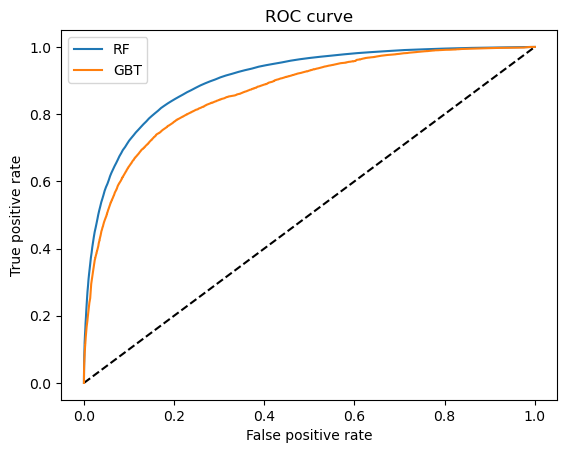

In [52]:
# The random forest model by itself
y_pred_grd_rfcat = rf.predict_proba(test_x)[:, 1]
y_pred_grd_gbtcat = gbt.predict_proba(test_x)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_y.values.reshape(-1, 1).flatten()=="s", y_pred_grd_rfcat)
fpr_gbt, tpr_gbt, _ = roc_curve(test_y.values.reshape(-1, 1).flatten()=="s", y_pred_grd_gbtcat)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gbt, tpr_gbt, label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Caption: An ROC plot of two different tree-based models. The models attempt to discern signal 's' from background 'b' based on features from particle physics data. The random forest model has had a random walk done to optimize hyperparameters while only a pre-hyperparameterized gradient boosted tree is also shown. The optimized random forest model eeks out a bit more performance over the original gradient boosted tree. The gradient boosted tree also could not be parallelized which would make performing a similar optimization of hyperparameters much more temporally expensive. I believe this makes the random forest model a much better canidate for classification of this kind because it's simply parallelization means the faster train times can be used to aggressivly optimize hyperparameters.